In [ ]:
!pip install transformers
import pandas as pd
import numpy as np
import torch
from transformers import pipeline
from classify import classify_broad, classify_fine
import json

with open('categories.json', 'r') as file:
    categories = json.load(file)

# Load the data
df_vd_3 = pd.read_csv('./data/Education_videos_3.csv')
data = df_vd_3.dropna()
year = 2018
data['upload_date'] = pd.to_datetime(data['upload_date'])
data['year'] = data['upload_date'].dt.year
data['month'] = data['upload_date'].dt.month
data['day'] = data['upload_date'].dt.day
data = data[data['year'] == year]
data = data.sample(n=100000, replace=False)  # Test with a subset first for optimization

# Initialize the classifier with batch support
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = pipeline("zero-shot-classification", model="typeform/distilbert-base-uncased-mnli", device=device)

# Pre-process text for batch classification
data['text'] = data['title'] + data['tags']

final_data = classify_broad(data, categories, on='text', classifier=classifier, batch_size=64)

# Display the results
final_data.head()

final_data.to_csv("data_with_categories.csv", index=False)

<ipython-input-5-1c2fae76f39f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['upload_date'] = pd.to_datetime(data['upload_date'])
<ipython-input-5-1c2fae76f39f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['upload_date'].dt.year
<ipython-input-5-1c2fae76f39f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

Converting to dataset...
Processing...


Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Converting back to dataframe...


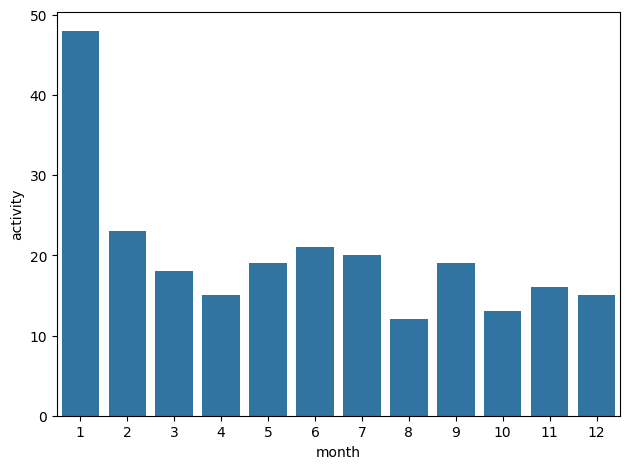

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

category = 'Academic and Formal Education'
views = final_data[final_data['broad_category'] == category].groupby('month').size().reset_index(name='activity')
sns.barplot(views, x='month', y='activity')

plt.tight_layout()